[Torch Basics](https://uvadlc-notebooks.readthedocs.io/en/latest/tutorial_notebooks/tutorial2/Introduction_to_PyTorch.html)

In [85]:
## Standard libraries
import os
import math
import numpy as np
import time

## Imports for plotting
import matplotlib.pyplot as plt
import matplotlib_inline
%matplotlib inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg', 'pdf') # For export
from matplotlib.colors import to_rgba
import seaborn as sns
sns.set()

## Progress bar
from tqdm.notebook import tqdm

In [86]:
import torch

print(f"Using Python: 3.9, torch: {torch.__version__}, numpy: {np.__version__}")

Using Python: 3.9, torch: 2.2.2+cu121, numpy: 1.26.4, IPython: 8.18.1


In [7]:
torch.manual_seed(42) # Setting the seed

#### Tensors ####

In [11]:
x = torch.Tensor(2, 3, 4)
print(f"tensor shape:\n{x.shape}\ntensor (raw, uninitialized values):\n{x}")

tensor shape:
torch.Size([2, 3, 4])
tensor (raw, uninitialized values):
tensor([[[7.3301e+24, 1.7320e-42, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]],

        [[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]]])


In [12]:
# Create a tensor from a (nested) list
x = torch.Tensor([[1, 2], [3, 4]])
print(f"tensor (initialized with input values):\n{x}")

tensor (initialized with input values):
tensor([[1., 2.],
        [3., 4.]])


In [14]:
# Create a tensor with random values between 0 and 1 with the shape [2, 3, 4]
x = torch.rand(2, 3, 4)
print(f"tensor (initialized with random values):\n{x}")

tensor (initialized with random values):
tensor([[[0.8823, 0.9150, 0.3829, 0.9593],
         [0.3904, 0.6009, 0.2566, 0.7936],
         [0.9408, 0.1332, 0.9346, 0.5936]],

        [[0.8694, 0.5677, 0.7411, 0.4294],
         [0.8854, 0.5739, 0.2666, 0.6274],
         [0.2696, 0.4414, 0.2969, 0.8317]]])


In [19]:
# Numpy to Torch, Torch to Numpy
np_arr = np.array([[1, 2], [3, 4]])
tensor = torch.from_numpy(np_arr)

print("Numpy array:", np_arr)
print("PyTorch tensor:", tensor)

tensor = torch.arange(1, 5)
np_arr = tensor.numpy().reshape([2, 2])

print("PyTorch tensor:", tensor)
print("Numpy array:", np_arr)

Numpy array: [[1 2]
 [3 4]]
PyTorch tensor: tensor([[1, 2],
        [3, 4]], dtype=torch.int32)
PyTorch tensor: tensor([1, 2, 3, 4])
Numpy array: [[1 2]
 [3 4]]


In [30]:
# Add tensors
x1 = torch.rand(2, 3)
x2 = torch.rand(2, 3)
y1 = x1 + x2
y2 = x1 - x2
y3 = x1 * x2
y4 = x1 / x2

print(f"\n\nX1: {x1}\nX2: {x2}\nx1 + x2: {y1}\nx1 - x2: {y2}\nx1 * x2: {y3}\nx1 / x2: {y4}")



X1: tensor([[0.0766, 0.8460, 0.3624],
        [0.3083, 0.0850, 0.0029]])
X2: tensor([[0.6431, 0.3908, 0.6947],
        [0.0897, 0.8712, 0.1330]])
x1 + x2: tensor([[0.7197, 1.2368, 1.0571],
        [0.3980, 0.9562, 0.1359]])
x1 - x2: tensor([[-0.5665,  0.4552, -0.3322],
        [ 0.2187, -0.7862, -0.1301]])
x1 * x2: tensor([[0.0493, 0.3306, 0.2518],
        [0.0276, 0.0740, 0.0004]])
x1 / x2: tensor([[0.1191, 2.1650, 0.5217],
        [3.4386, 0.0975, 0.0220]])


In [33]:
# tensor shape
x = torch.arange(6)
print("X (1D tensor)", x)

x = x.view(2, 3)
print("X (2D tensor)", x)

x = x.permute(1, 0) # Swapping dimension 0 and 1
print("X (dim 0 <-> dim 1)", x)

W = torch.arange(9).view(3, 3) # We can also stack multiple operations in a single line
print("W", W)

X (1D tensor) tensor([0, 1, 2, 3, 4, 5])
X (2D tensor) tensor([[0, 1, 2],
        [3, 4, 5]])
X (dim 0 <-> dim 1) tensor([[0, 3],
        [1, 4],
        [2, 5]])
W tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])


In [34]:
h = torch.matmul(x.permute(1, 0), W) # Verify the result by calculating it by hand too!
print("h", h)

h tensor([[15, 18, 21],
        [42, 54, 66]])


In [35]:
# indexing
x = torch.arange(12).view(3, 4)
print("X", x)
print(x[:, 1])   # Second column
print(x[0])      # First row
print(x[:2, -1]) # First two rows, last column
print(x[1:3, :]) # Middle two rows

X tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
tensor([1, 5, 9])
tensor([0, 1, 2, 3])
tensor([3, 7])
tensor([[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


#### Dynamic Computation Graph and Backpropagation ####
\begin{align}
y = \frac{1}{N}\sum_{t=1}^{N=3} [(x_i + 2)^2 + 3]
\end{align}

In [48]:
x = torch.ones((3,))
print(x.requires_grad)
x.requires_grad_(True)
print(x.requires_grad)
x = torch.arange(3, dtype=torch.float32, requires_grad=True) # Only float tensors can have gradients
print("X", x)
# calculate a based on the inputs x and the constant 2, b is a squared, and so on.
a = x + 2
b = a ** 2
c = b + 3
y = c.mean()
y.backward()
print(f"A: {a}, B: {b}, C: {c}, Y: {y:0.2f}, dy/dx at x=(0, 1, 2): {x.grad}")

False
True
X tensor([0., 1., 2.], requires_grad=True)
A: tensor([2., 3., 4.], grad_fn=<AddBackward0>), B: tensor([ 4.,  9., 16.], grad_fn=<PowBackward0>), C: tensor([ 7., 12., 19.], grad_fn=<AddBackward0>), Y: 12.67, dy/dx at x=(0, 1, 2): tensor([1.3333, 2.0000, 2.6667])


#### Neural Network for Continuous XOR ####
![Computation Graph](./computationgraph.png)![xxx](./simpleclassifier.png)

In [87]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleClassifier(nn.Module):
    """
    Given two binary inputs (num_inputs = 2), x1 and x2, the label to predict is 1 if either x1 or x2 is 1 while the other is 0,
    or the label is 0 in all other cases. The example became famous by the fact that a single neuron, i.e. a linear classifier,
    cannot learn this simple function. Hence, we will learn how to build a small neural network that can learn this function.
    To make it a little bit more interesting, we move the XOR into continuous space and introduce some gaussian noise
    on the binary inputs.

    """
    def __init__(self, num_inputs, num_hidden, num_outputs):
        super().__init__()
        # Initialize the modules we need to build the network
        self.layer1 = nn.Linear(num_inputs, num_hidden)
        self.act_fn = nn.Tanh()
        self.layer2 = nn.Linear(num_hidden, num_outputs)

    def forward(self, x):
        # Perform the calculation of the model to determine the prediction
        x = self.layer1(x)
        x = self.act_fn(x)
        x = self.layer2(x)
        return x

# binary inputs: num_inputs=2; label: num_outputs=1
model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1)
# Printing a module shows all its submodules
print(model)

SimpleClassifier(
  (layer1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (layer2): Linear(in_features=4, out_features=1, bias=True)
)


In [88]:
for name, param in model.named_parameters():
    print(f"Parameter {name}, shape {param.shape}")

Parameter layer1.weight, shape torch.Size([4, 2])
Parameter layer1.bias, shape torch.Size([4])
Parameter layer2.weight, shape torch.Size([1, 4])
Parameter layer2.bias, shape torch.Size([1])


#### Data ####

In [51]:
import torch.utils.data as data

class XORDataset(data.Dataset):

    def __init__(self, size, std=0.1):
        """
        Inputs:
            size - Number of data points we want to generate
            std - Standard deviation of the noise (see generate_continuous_xor function)
        """
        super().__init__()
        self.size = size
        self.std = std
        self.generate_continuous_xor()

    def generate_continuous_xor(self):
        # Each data point in the XOR dataset has two variables, x and y, that can be either 0 or 1
        # The label is their XOR combination, i.e. 1 if only x or only y is 1 while the other is 0.
        # If x=y, the label is 0.
        data = torch.randint(low=0, high=2, size=(self.size, 2), dtype=torch.float32)
        label = (data.sum(dim=1) == 1).to(torch.long)
        # To make it slightly more challenging, we add a bit of gaussian noise to the data points.
        data += self.std * torch.randn(data.shape)

        self.data = data
        self.label = label

    def __len__(self):
        # Number of data point we have. Alternatively self.data.shape[0], or self.label.shape[0]
        return self.size

    def __getitem__(self, idx):
        # Return the idx-th data point of the dataset
        # If we have multiple things to return (data point and label), we can return them as tuple
        if idx < self.size:
            data_point = self.data[idx]
            data_label = self.label[idx]
        else:
            data_point = None
            data_label = None
        return data_point, data_label

In [52]:
dataset = XORDataset(size=200)
print("Size of dataset:", len(dataset))
print("Data point 0:", dataset[0])

Size of dataset: 200
Data point 0: (tensor([0.2622, 1.0369]), tensor(1))


In [53]:
def visualize_samples(data, label):
    if isinstance(data, torch.Tensor):
        data = data.cpu().numpy()
    if isinstance(label, torch.Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]

    plt.figure(figsize=(4,4))
    plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

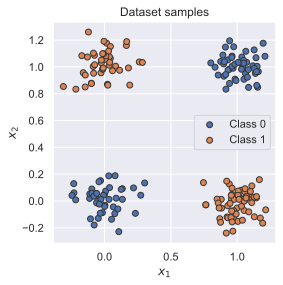

In [54]:
visualize_samples(dataset.data, dataset.label)
plt.show()

#### Data Loader ####

In [55]:
data_loader = data.DataLoader(dataset, batch_size=8, shuffle=True) # dataset is an object of XORDataset(size=200)

In [56]:
# next(iter(...)) catches the first batch of the data loader
# If shuffle is True, this will return a different batch every time we run this cell
# For iterating over the whole dataset, we can simple use "for batch in data_loader: ..."
data_inputs, data_labels = next(iter(data_loader))

# The shape of the outputs are [batch_size, d_1,...,d_N] where d_1,...,d_N are the
# dimensions of the data point returned from the dataset class
print("Data inputs", data_inputs.shape, "\n", data_inputs)
print("Data labels", data_labels.shape, "\n", data_labels)

Data inputs torch.Size([8, 2]) 
 tensor([[ 0.0368,  1.0764],
        [-0.0237,  1.0510],
        [ 0.9552,  0.0423],
        [-0.0270,  0.0123],
        [-0.0598, -0.0135],
        [ 0.2326, -0.0920],
        [ 1.1371,  0.9519],
        [ 0.0380,  0.0999]])
Data labels torch.Size([8]) 
 tensor([1, 1, 1, 0, 0, 0, 0, 0])


#### Optimization ####
Training:
1. Get a batch from the data loader
2. Obtain the predictions from the model for the batch
3. Calculate the loss based on the difference between predictions and labels
4. Backpropagation: calculate the gradients for every parameter with respect to the loss
5. Update the parameters of the model in the direction of the gradients

##### Binary Cross-Entropy Loss Function #####
\begin{align}
L = -\sum_i [y_i log(x_i) + (1 - y_i) log(1 - x_i)]
\end{align}
where y_i is the label, x_i is our prediction, 0 <= x, y <= 1

In [57]:
loss_module = nn.BCEWithLogitsLoss()

##### Stochastic Gradient Descent #####

In [59]:
# Input to the optimizer are the parameters of the model: model.parameters(). lr: learning rate, model: simpleclassifier object
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

##### Training #####

In [60]:
train_dataset = XORDataset(size=2500)
train_data_loader = data.DataLoader(train_dataset, batch_size=128, shuffle=True)

In [62]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device", device)

Device cpu


In [63]:
# Push model to device. Has to be done, but only once
model.to(device)

SimpleClassifier(
  (layer1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (layer2): Linear(in_features=4, out_features=1, bias=True)
)

In [64]:
def train_model(model, optimizer, data_loader, loss_module, num_epochs=100):
    # Set model to train mode
    model.train()

    # Training loop
    for epoch in tqdm(range(num_epochs)):
        for data_inputs, data_labels in data_loader:

            ## Step 1: Move input data to device (only strictly necessary if we use GPU)
            data_inputs = data_inputs.to(device)
            data_labels = data_labels.to(device)

            ## Step 2: Run the model on the input data
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1) # Output is [Batch size, 1], but we want [Batch size]

            ## Step 3: Calculate the loss
            loss = loss_module(preds, data_labels.float())

            ## Step 4: Perform backpropagation
            # Before calculating the gradients, we need to ensure that they are all zero.
            # The gradients would not be overwritten, but actually added to the existing ones.
            optimizer.zero_grad()
            # Perform backpropagation
            loss.backward()

            ## Step 5: Update the parameters
            optimizer.step()

In [65]:
train_model(model, optimizer, train_data_loader, loss_module)

  0%|          | 0/100 [00:00<?, ?it/s]

In [66]:
# Save our model for convinience
state_dict = model.state_dict()
print(state_dict)

OrderedDict([('layer1.weight', tensor([[ 0.0366, -0.2624],
        [ 2.1414,  1.9352],
        [ 3.5342, -2.8266],
        [ 2.2039, -3.0799]])), ('layer1.bias', tensor([ 0.0582, -0.3021,  1.2085, -0.8260])), ('layer2.weight', tensor([[ 0.2576,  2.8069, -4.3204,  4.2188]])), ('layer2.bias', tensor([1.6561]))])


In [67]:
# torch.save(object, filename). For the filename, any extension can be used
torch.save(state_dict, "simpleclassifier_model.tar")

In [69]:
# Load state dict from the disk (make sure it is the same name as above)
state_dict = torch.load("simpleclassifier_model.tar")

# Create a new model and load the state
new_model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1)
new_model.load_state_dict(state_dict)

# Verify that the parameters are the same
print("Original model\n", model.state_dict())
print("\nLoaded model\n", new_model.state_dict())

Original model
 OrderedDict([('layer1.weight', tensor([[ 0.0366, -0.2624],
        [ 2.1414,  1.9352],
        [ 3.5342, -2.8266],
        [ 2.2039, -3.0799]])), ('layer1.bias', tensor([ 0.0582, -0.3021,  1.2085, -0.8260])), ('layer2.weight', tensor([[ 0.2576,  2.8069, -4.3204,  4.2188]])), ('layer2.bias', tensor([1.6561]))])

Loaded model
 OrderedDict([('layer1.weight', tensor([[ 0.0366, -0.2624],
        [ 2.1414,  1.9352],
        [ 3.5342, -2.8266],
        [ 2.2039, -3.0799]])), ('layer1.bias', tensor([ 0.0582, -0.3021,  1.2085, -0.8260])), ('layer2.weight', tensor([[ 0.2576,  2.8069, -4.3204,  4.2188]])), ('layer2.bias', tensor([1.6561]))])


##### Evaluation #####
\begin{align}
Accuracy = \frac{\# correct    predictions}{\# all    predictions} = \frac{TP + TN}{TP + TN + FP + FN}
\end{align}

In [70]:
def eval_model(model, data_loader):
    model.eval() # Set model to eval mode
    true_preds, num_preds = 0., 0.

    with torch.no_grad(): # Deactivate gradients for the following code
        for data_inputs, data_labels in data_loader:

            # Determine prediction of model on dev set
            data_inputs, data_labels = data_inputs.to(device), data_labels.to(device)
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1)
            preds = torch.sigmoid(preds) # Sigmoid to map predictions between 0 and 1
            pred_labels = (preds >= 0.5).long() # Binarize predictions to 0 and 1

            # Keep records of predictions for the accuracy metric (true_preds=TP+TN, num_preds=TP+TN+FP+FN)
            true_preds += (pred_labels == data_labels).sum()
            num_preds += data_labels.shape[0]

    acc = true_preds / num_preds
    print(f"Accuracy of the model: {100.0*acc:4.2f}%")

In [72]:
test_dataset = XORDataset(size=500)
# drop_last -> Don't drop the last batch although it is smaller than 128
test_data_loader = data.DataLoader(test_dataset, batch_size=128, shuffle=False, drop_last=False)

In [73]:
eval_model(model, test_data_loader)

Accuracy of the model: 100.00%


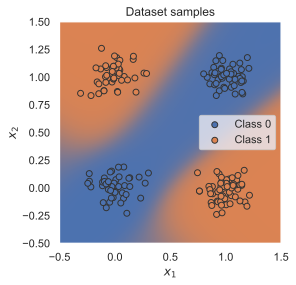

In [74]:
@torch.no_grad() # Decorator, same effect as "with torch.no_grad(): ..." over the whole function.
def visualize_classification(model, data, label):
    if isinstance(data, torch.Tensor):
        data = data.cpu().numpy()
    if isinstance(label, torch.Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]

    fig = plt.figure(figsize=(4,4), dpi=500)
    plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

    # Let's make use of a lot of operations we have learned above
    model.to(device)
    c0 = torch.Tensor(to_rgba("C0")).to(device)
    c1 = torch.Tensor(to_rgba("C1")).to(device)
    x1 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    x2 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    xx1, xx2 = torch.meshgrid(x1, x2, indexing='ij')  # Meshgrid function as in numpy
    model_inputs = torch.stack([xx1, xx2], dim=-1)
    preds = model(model_inputs)
    preds = torch.sigmoid(preds)
    output_image = (1 - preds) * c0[None,None] + preds * c1[None,None]  # Specifying "None" in a dimension creates a new one
    output_image = output_image.cpu().numpy()  # Convert to numpy array. This only works for tensors on CPU, hence first push to CPU
    plt.imshow(output_image, origin='lower', extent=(-0.5, 1.5, -0.5, 1.5))
    plt.grid(False)
    return fig

_ = visualize_classification(model, dataset.data, dataset.label)
plt.show()

##### Tensorboard Logging #####
TensorBoard is a visualization toolkit for machine learning experimentation. It allows users to track and visualize metrics such as loss and accuracy, view the model graph, examine histograms of weights and biases, project embeddings to lower-dimensional space, and display images, text, and audio data. It supports multiple frameworks, including TensorFlow, PyTorch, and Hugging Face Transformers.

In [77]:
from torch.utils.tensorboard import SummaryWriter

# Load tensorboard extension for Jupyter Notebook, only need to start TB in the notebook
%load_ext tensorboard

In [78]:
def train_model_with_logger(model, optimizer, data_loader, loss_module, val_dataset, num_epochs=100, logging_dir='runs/our_experiment'):
    # Create TensorBoard logger
    writer = SummaryWriter(logging_dir)
    model_plotted = False

    # Set model to train mode
    model.train()

    # Training loop
    for epoch in tqdm(range(num_epochs)):
        epoch_loss = 0.0
        for data_inputs, data_labels in data_loader:

            ## Step 1: Move input data to device (only strictly necessary if we use GPU)
            data_inputs = data_inputs.to(device)
            data_labels = data_labels.to(device)

            # For the very first batch, we visualize the computation graph in TensorBoard
            if not model_plotted:
                writer.add_graph(model, data_inputs)
                model_plotted = True

            ## Step 2: Run the model on the input data
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1) # Output is [Batch size, 1], but we want [Batch size]

            ## Step 3: Calculate the loss
            loss = loss_module(preds, data_labels.float())

            ## Step 4: Perform backpropagation
            # Before calculating the gradients, we need to ensure that they are all zero.
            # The gradients would not be overwritten, but actually added to the existing ones.
            optimizer.zero_grad()
            # Perform backpropagation
            loss.backward()

            ## Step 5: Update the parameters
            optimizer.step()

            ## Step 6: Take the running average of the loss
            epoch_loss += loss.item()

        # Add average loss to TensorBoard
        epoch_loss /= len(data_loader)
        writer.add_scalar('training_loss',
                          epoch_loss,
                          global_step = epoch + 1)

        # Visualize prediction and add figure to TensorBoard
        # Since matplotlib figures can be slow in rendering, we only do it every 10th epoch
        if (epoch + 1) % 10 == 0:
            fig = visualize_classification(model, val_dataset.data, val_dataset.label)
            writer.add_figure('predictions',
                              fig,
                              global_step = epoch + 1)

    writer.close()

In [79]:
model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
train_model_with_logger(model, optimizer, train_data_loader, loss_module, val_dataset=dataset)

  0%|          | 0/100 [00:00<?, ?it/s]

In [80]:
%tensorboard --logdir runs/our_experiment